<a href="https://colab.research.google.com/github/arecoluiz/Assignment_19/blob/main/Assignment_19_Credit_Card_Dataset_for_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install sweetviz

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from google.colab import files
import sweetviz as sv
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
uploaded = files.upload()
df = pd.read_csv('CC GENERAL.csv')

Saving CC GENERAL.csv to CC GENERAL (1).csv


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.shape

(8950, 18)

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [8]:
df.fillna(df.min(), inplace=True)

In [9]:
df1=df[df['BALANCE'] < df['BALANCE'].quantile(.95)]
df1=df1[df1['PURCHASES'] < df['PURCHASES'].quantile(.95)]
df1=df1[df1['MINIMUM_PAYMENTS'] < df['MINIMUM_PAYMENTS'].quantile(.95)]
df1=df1[df1['PAYMENTS'] < df['PAYMENTS'].quantile(.95)]
df1=df1[df1['CREDIT_LIMIT'] < df['CREDIT_LIMIT'].quantile(.95)]
df1=df1[df1['PURCHASES_TRX'] < df['PURCHASES_TRX'].quantile(.95)]
df1=df1[df1['ONEOFF_PURCHASES'] < df['ONEOFF_PURCHASES'].quantile(.95)]
df1=df1[df1['CASH_ADVANCE'] < df['CASH_ADVANCE'].quantile(.95)]
df1=df1[df1['CASH_ADVANCE_TRX'] < df['CASH_ADVANCE_TRX'].quantile(.95)]

In [13]:
# colum_name = ['BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT','PURCHASES_TRX',  'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX']

In [14]:
# for i in colum_name:
#   df1 = pd.DataFrame()
#   df1 = df1[df1[i] < df[i].quantile(.95)]

In [10]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,995.151694,0.857780,579.426174,300.337948,279.366419,500.025960,0.469246,0.162995,0.346478,0.100031,1.823547,9.750872,3456.202556,974.664002,410.897522,0.153512,11.468750
std,1190.965770,0.252570,721.139243,517.630795,452.429074,902.031092,0.391970,0.261136,0.386524,0.152807,2.995315,11.296587,2465.720075,974.757099,443.575376,0.290509,1.404998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,75.973734,0.818182,41.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.166113,145.768171,0.000000,12.000000
50%,547.868765,1.000000,308.190000,0.000000,76.430000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.000000,651.613201,218.279833,0.000000,12.000000
75%,1462.396758,1.000000,832.010000,395.012500,387.702500,650.349033,0.916667,0.250000,0.750000,0.166667,3.000000,13.000000,5000.000000,1298.660032,531.724151,0.166667,12.000000
max,5906.184924,1.000000,3986.240000,2655.990000,3927.120000,4639.195255,1.000000,1.000000,1.000000,1.166667,14.000000,56.000000,11500.000000,6043.227704,2707.521979,1.000000,12.000000


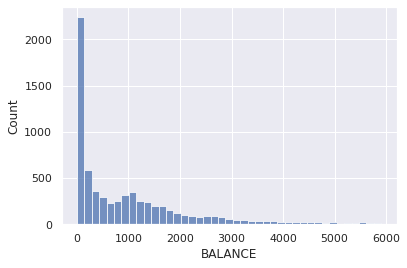

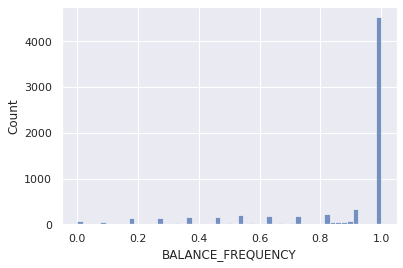

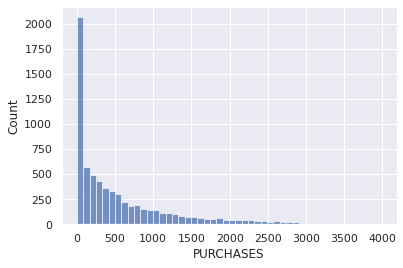

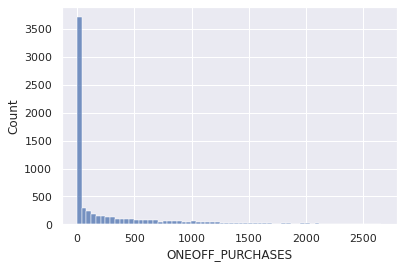

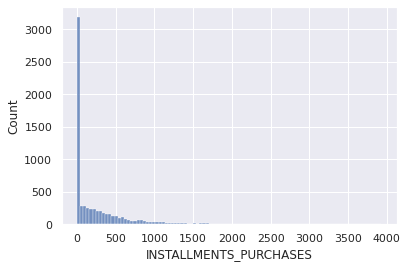

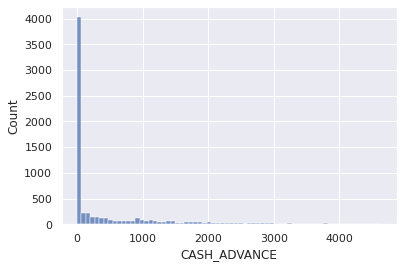

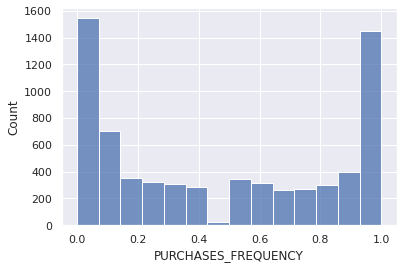

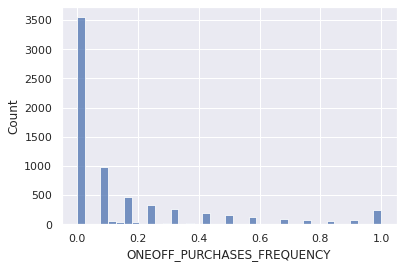

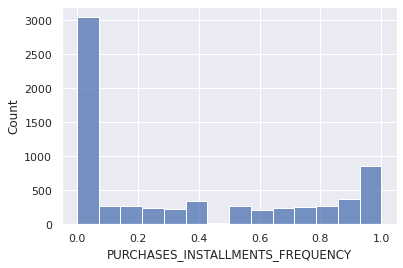

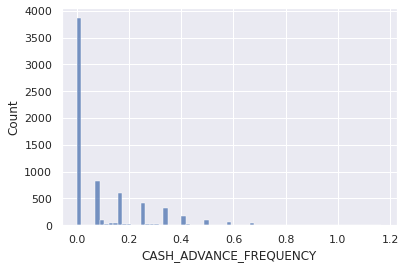

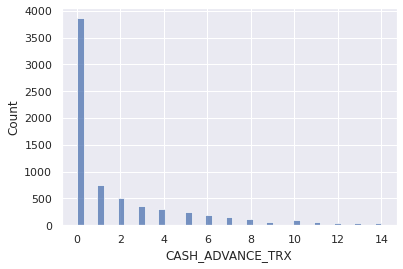

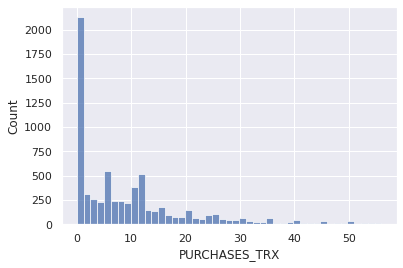

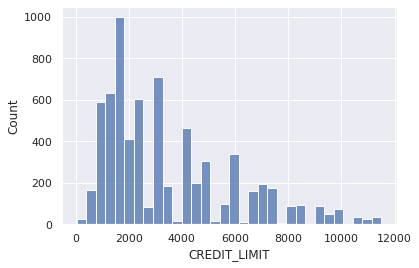

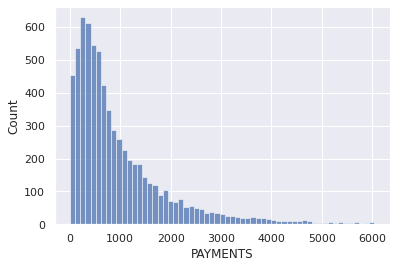

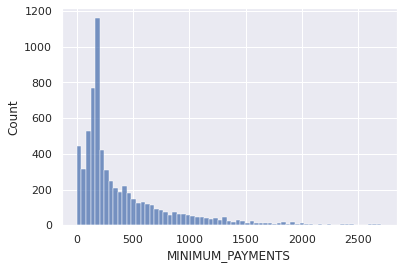

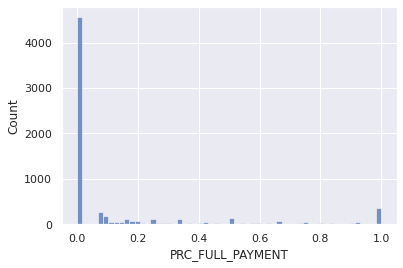

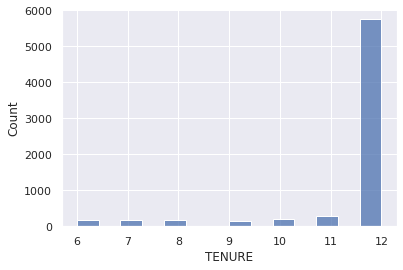

In [11]:
for i in df1.columns:
  sns.histplot(x=i, data=df1)
  plt.show()

                                             |          | [  0%]   00:00 -> (? left)


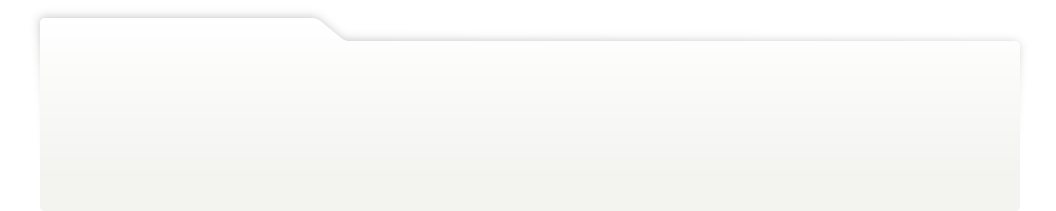
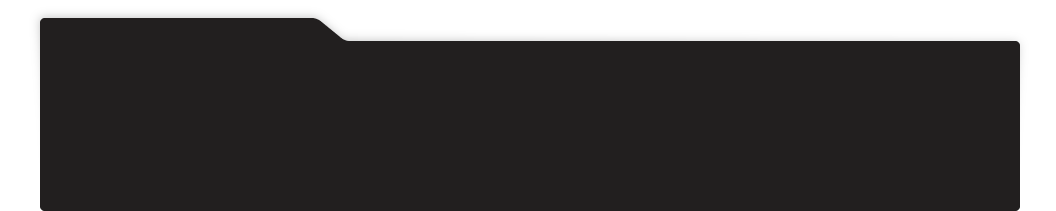
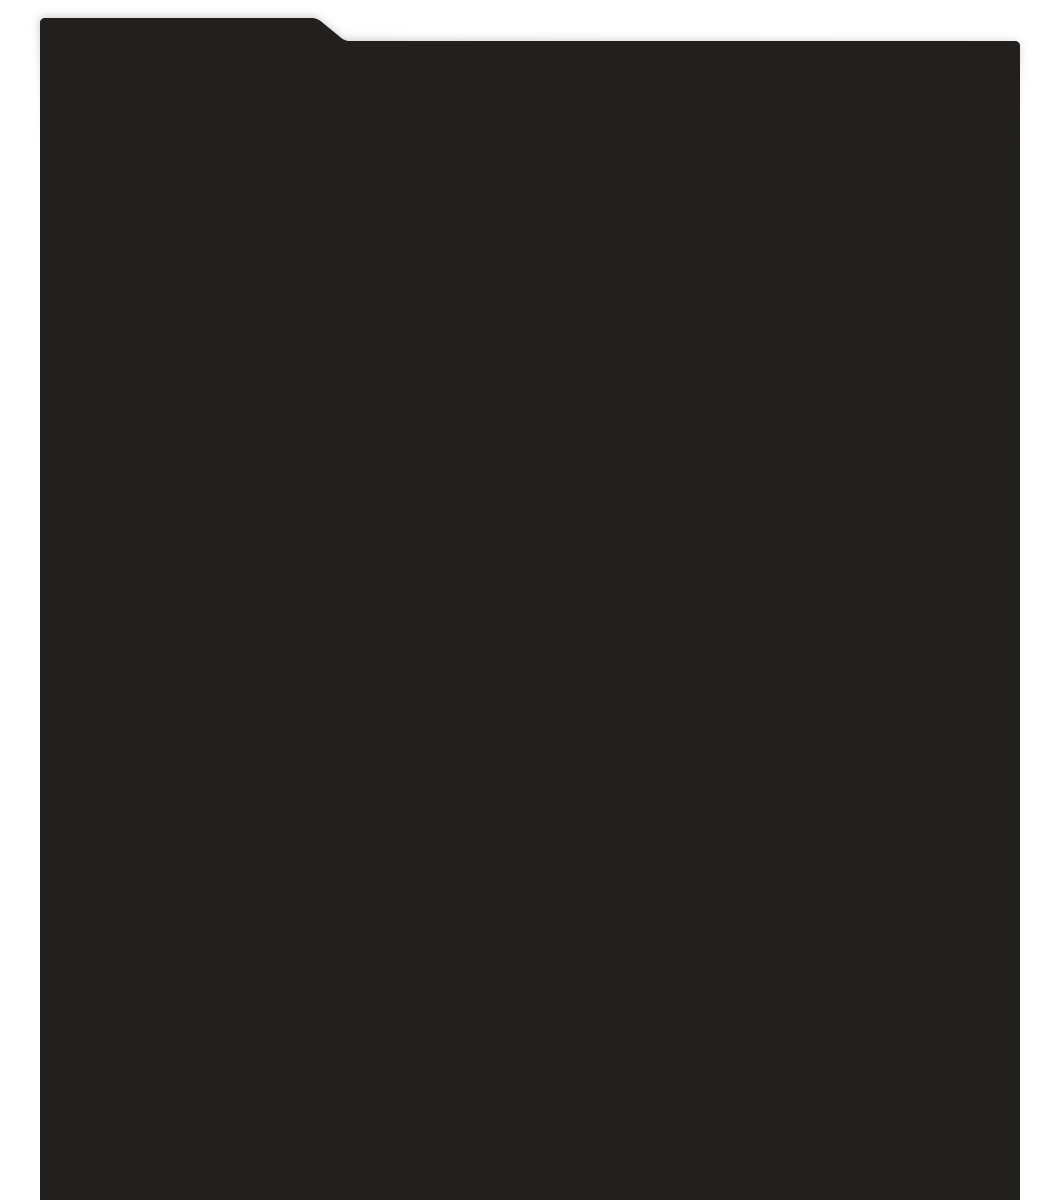
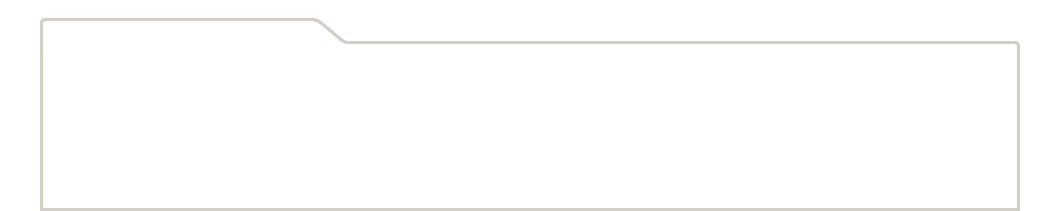
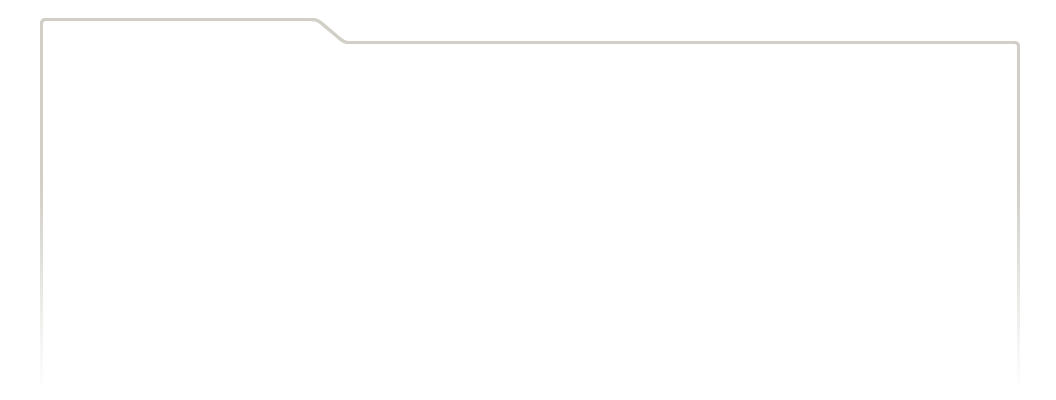
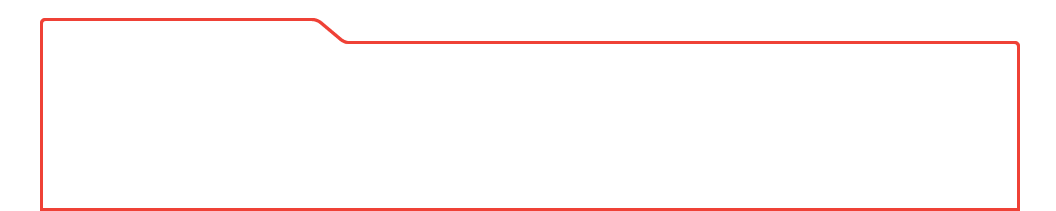
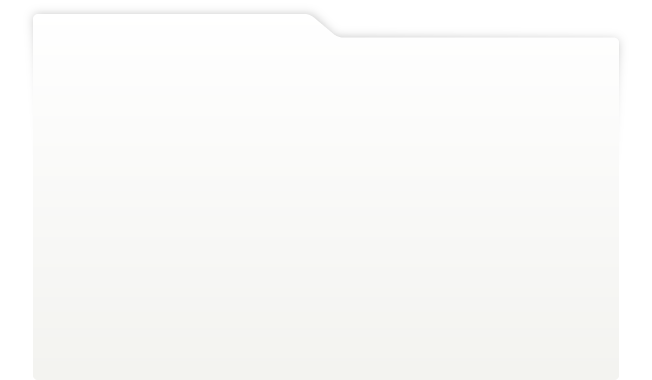
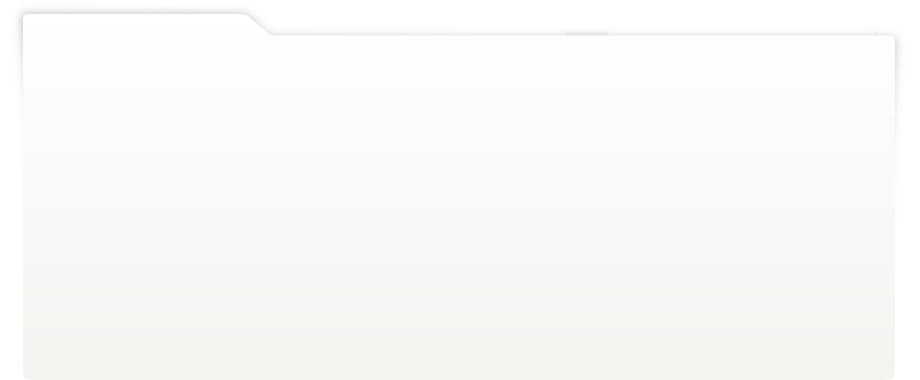
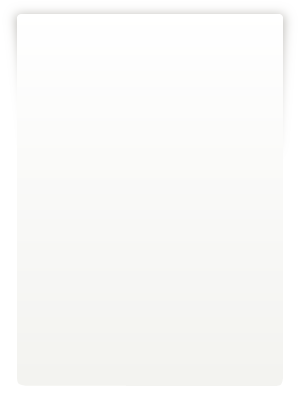
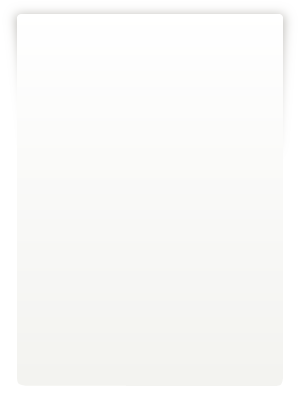
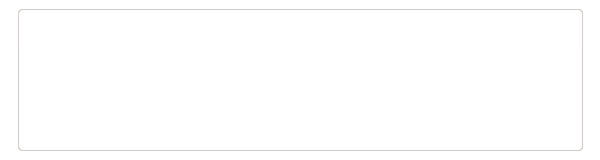
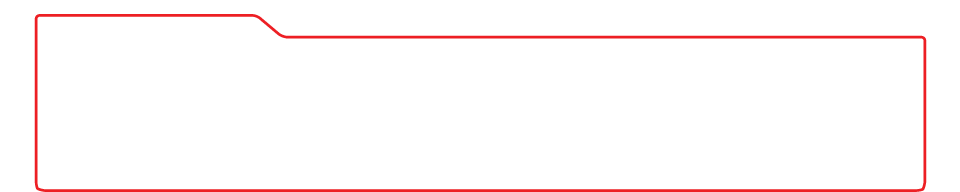
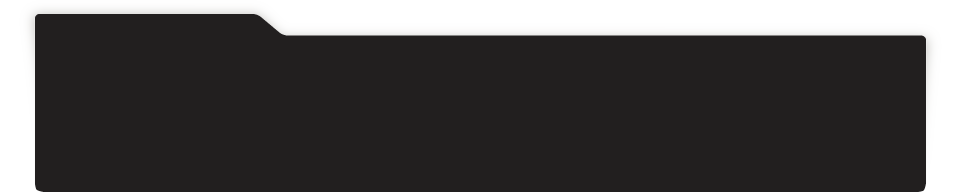
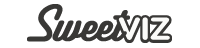
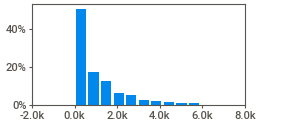
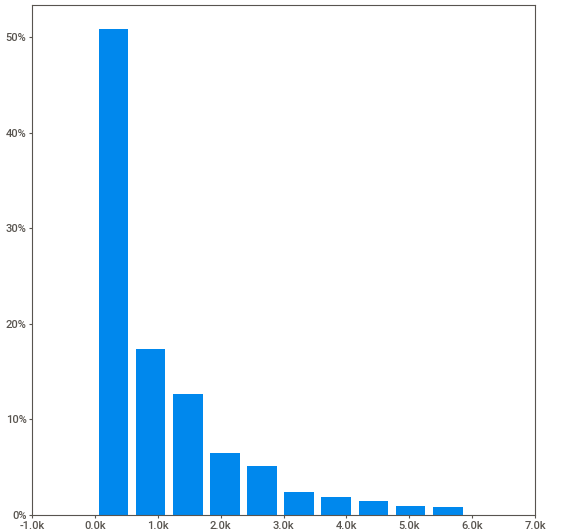
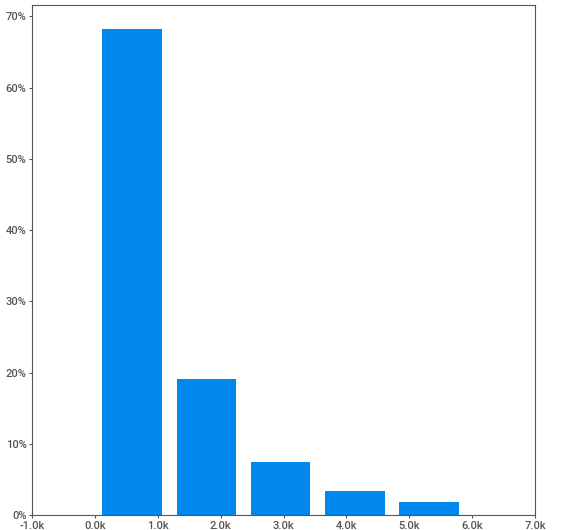
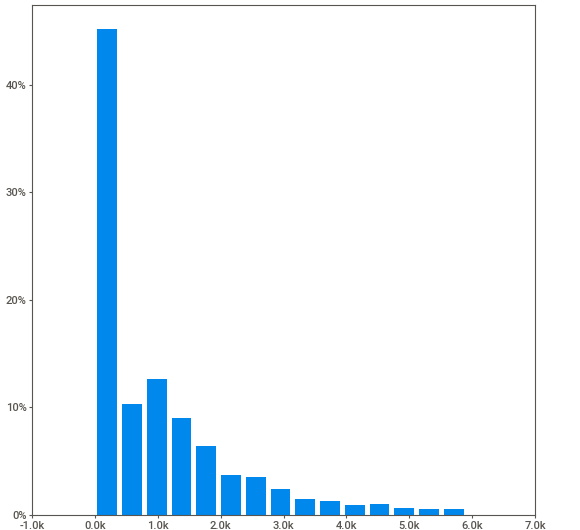
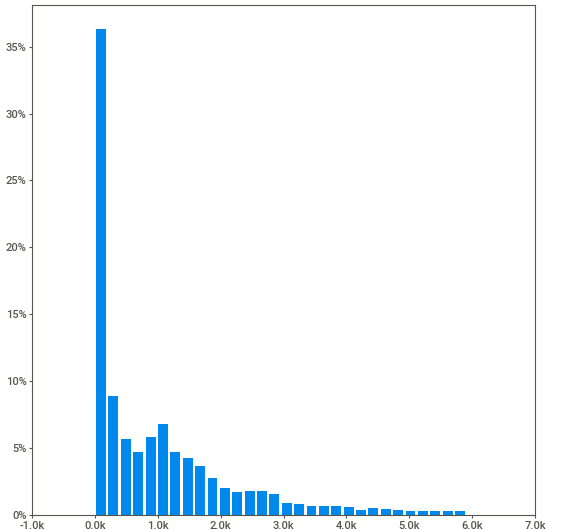
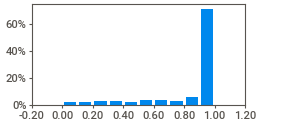
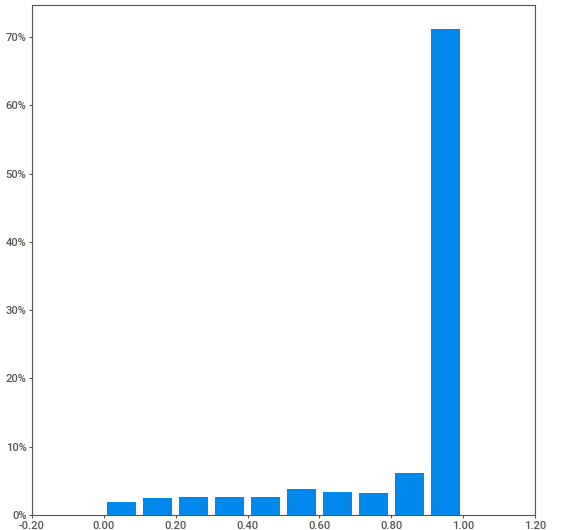
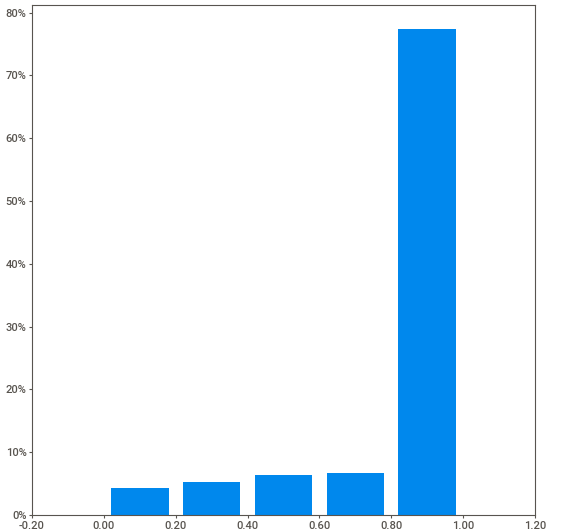
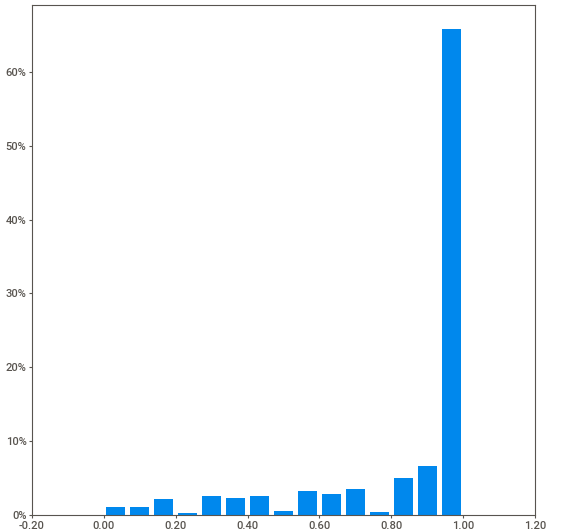
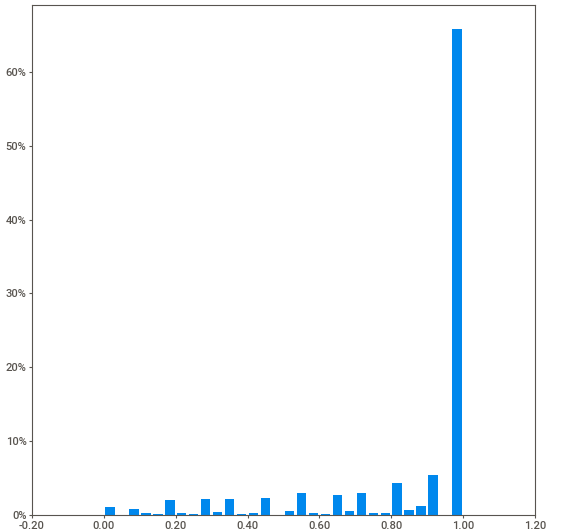
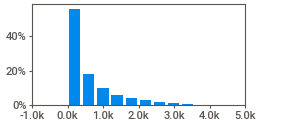
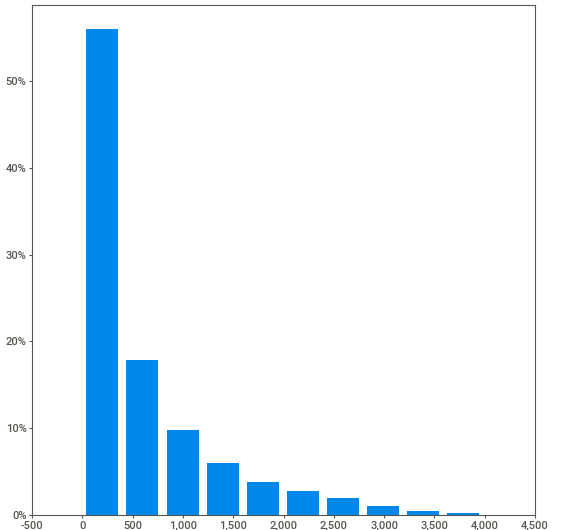
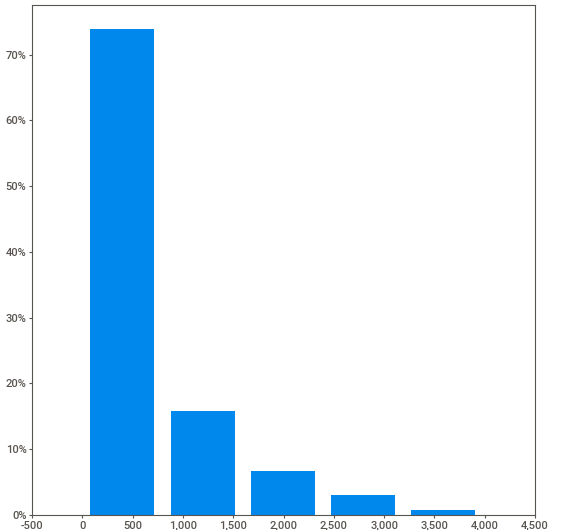
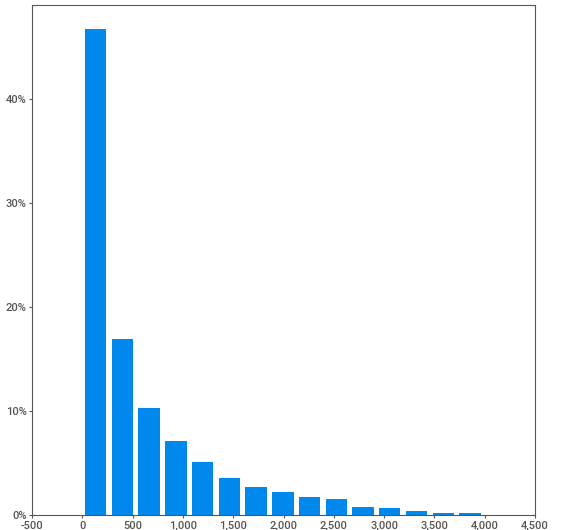
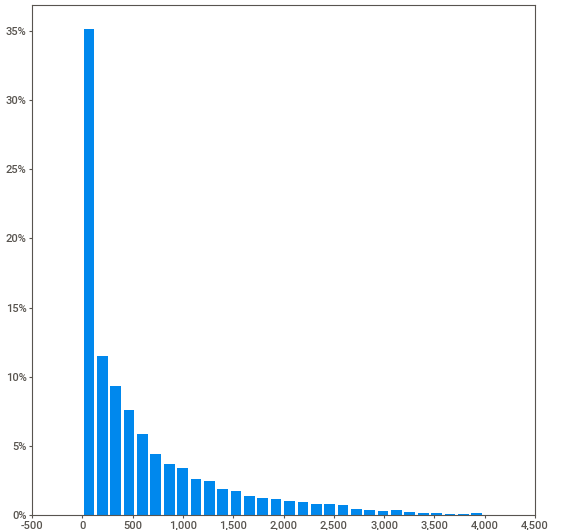
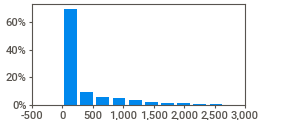
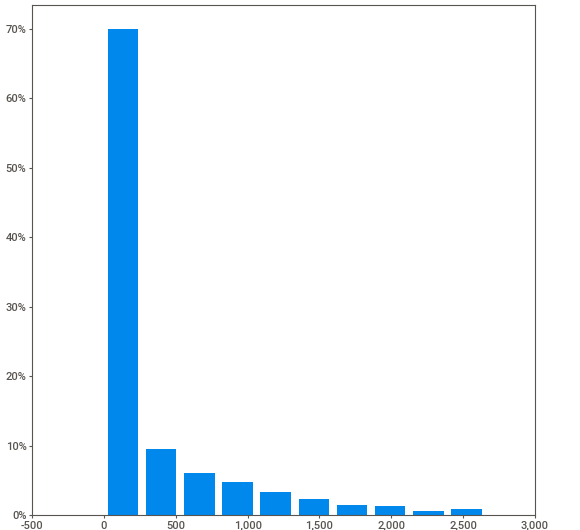
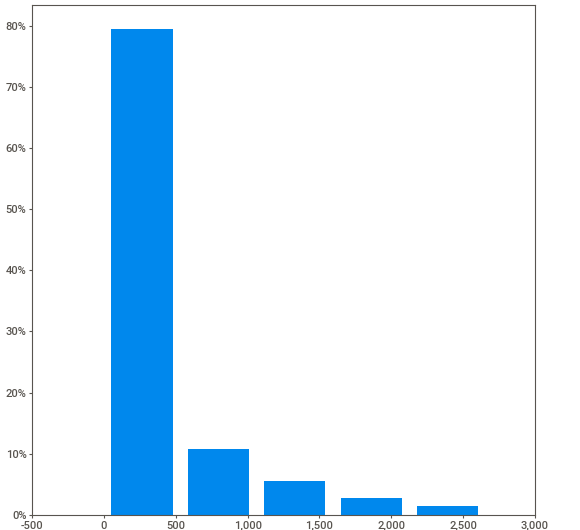
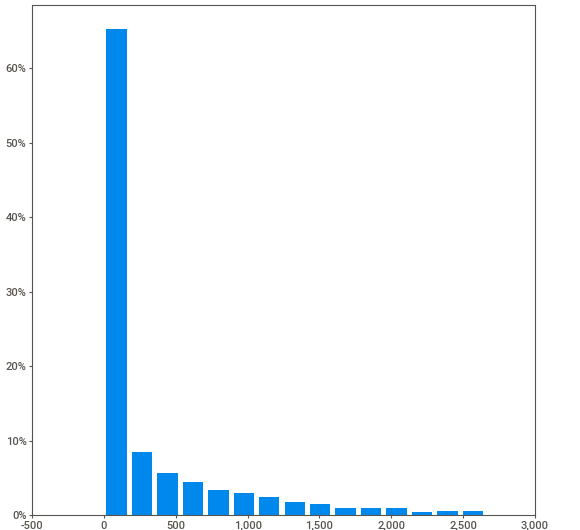
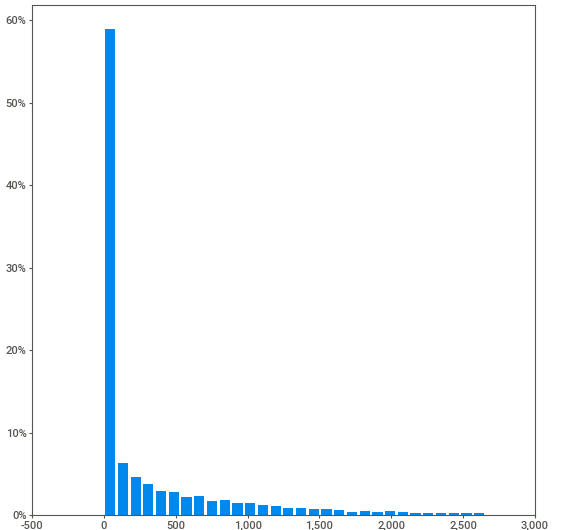
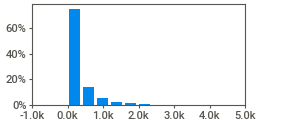
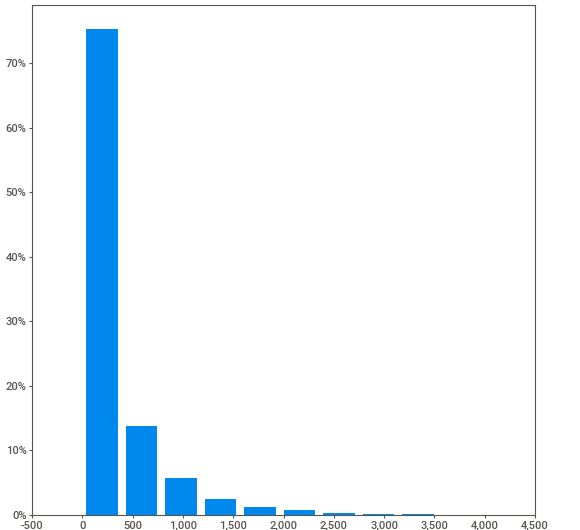
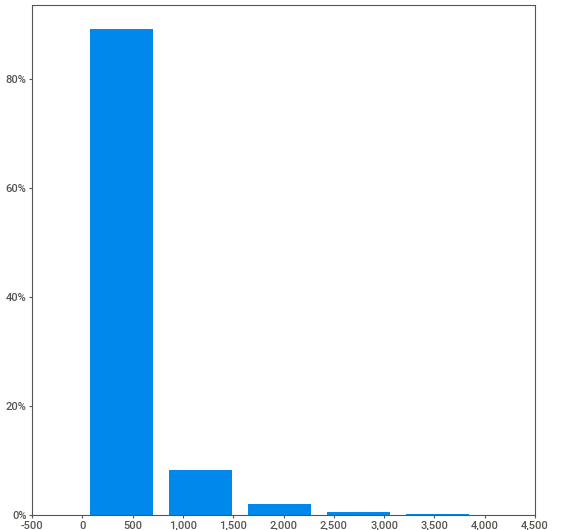
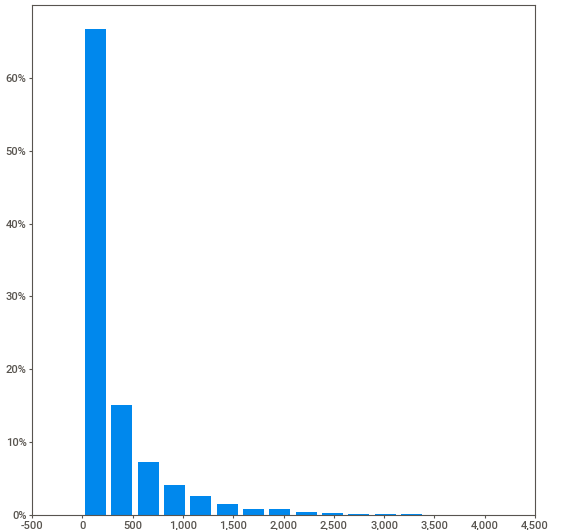
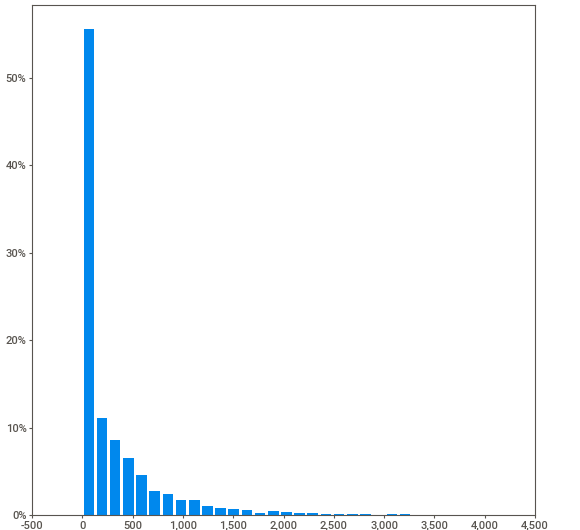
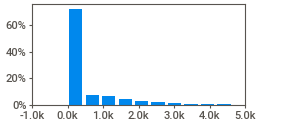
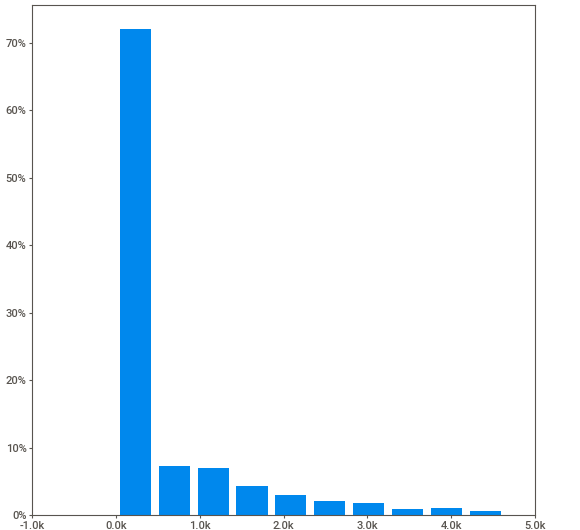
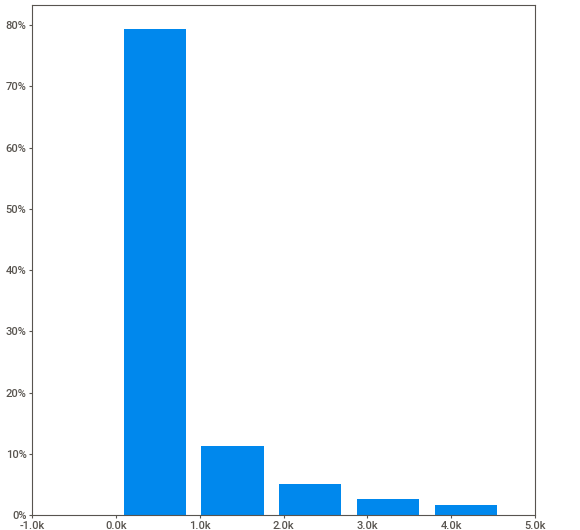
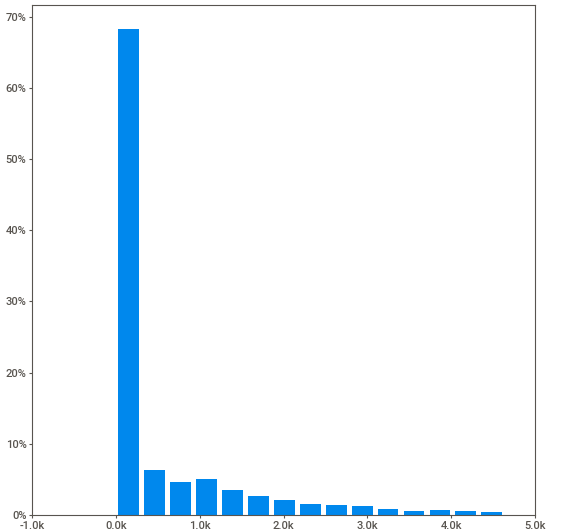
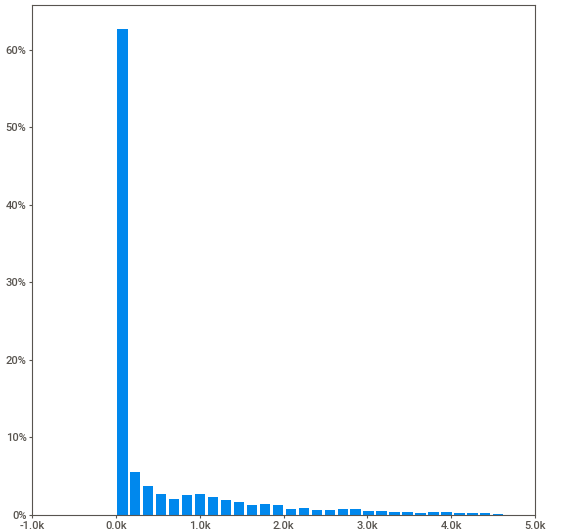
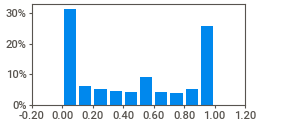
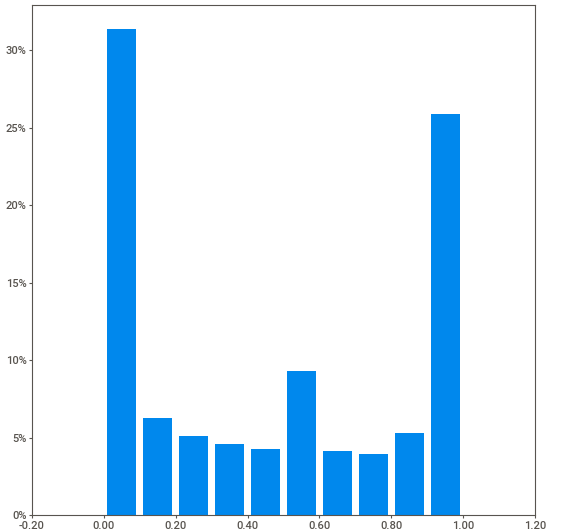
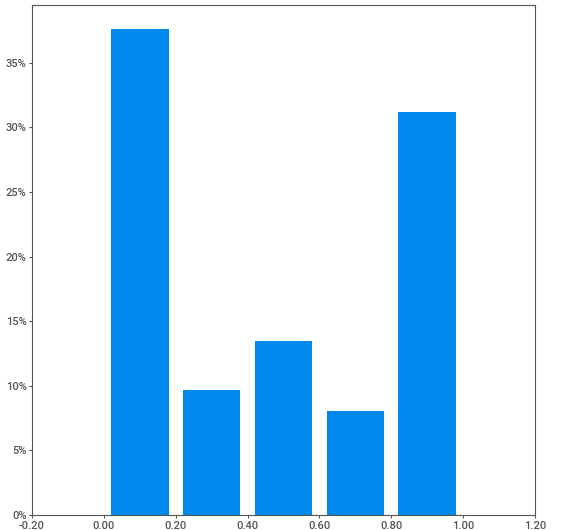
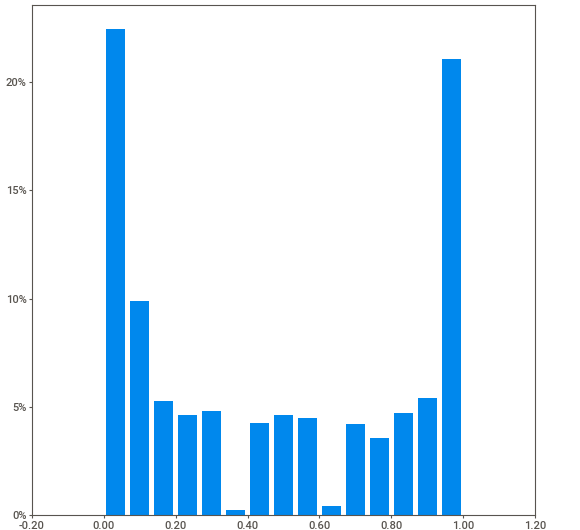
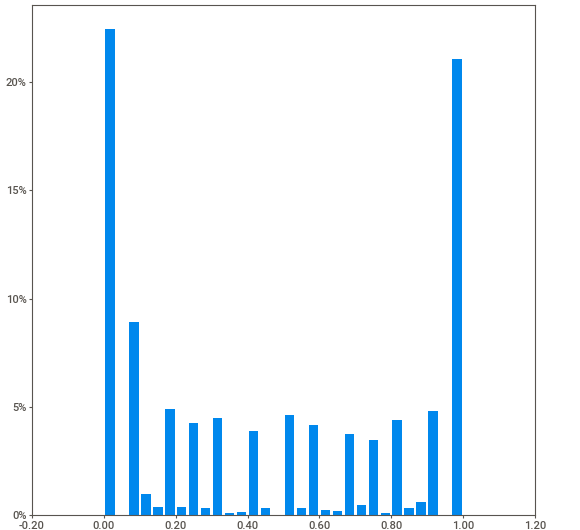
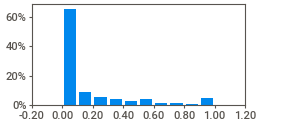
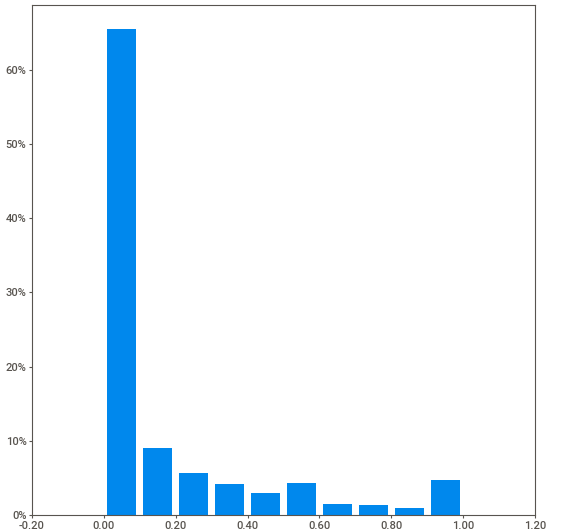
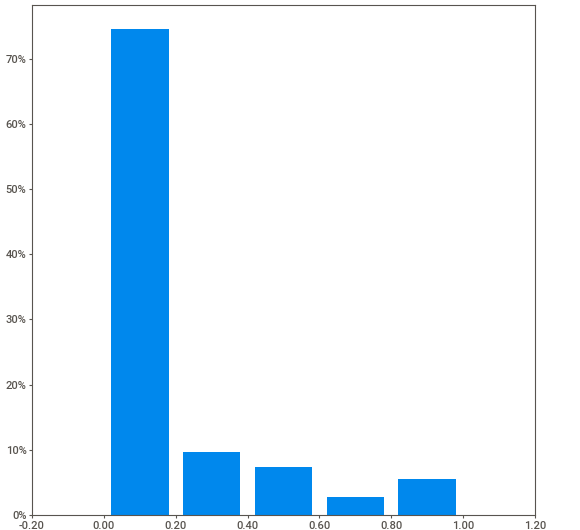
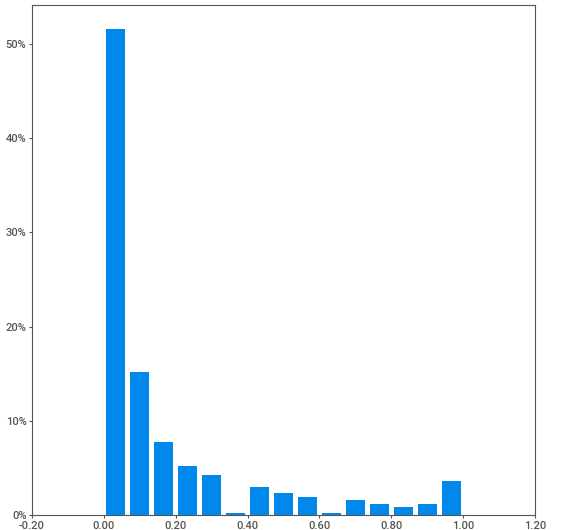
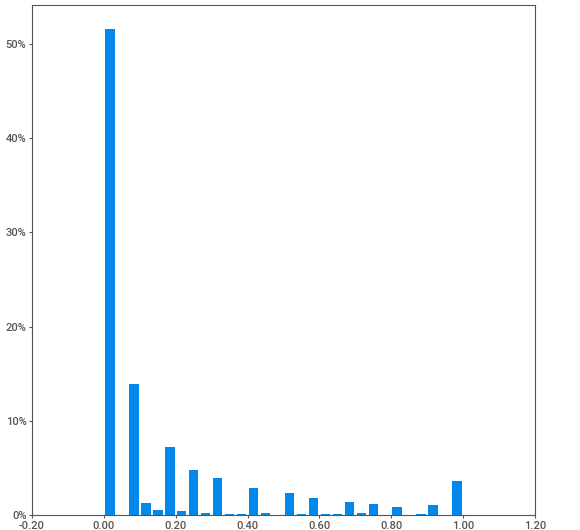
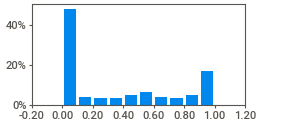
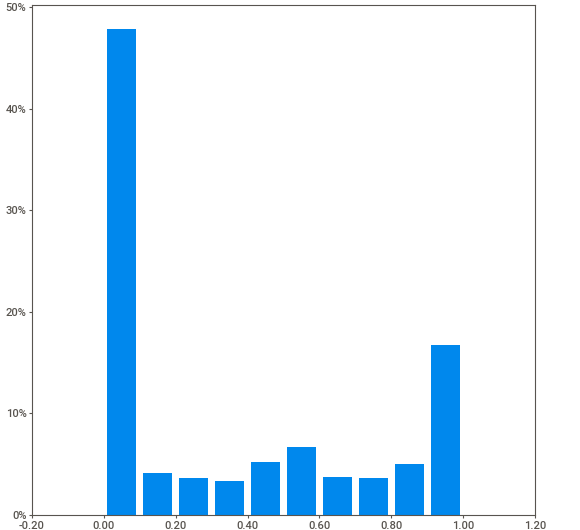
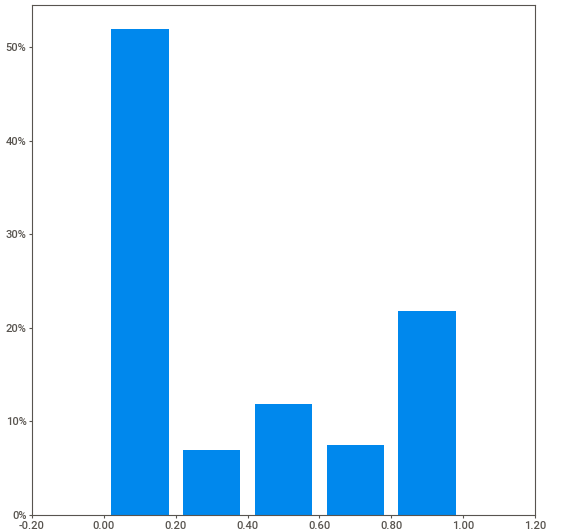
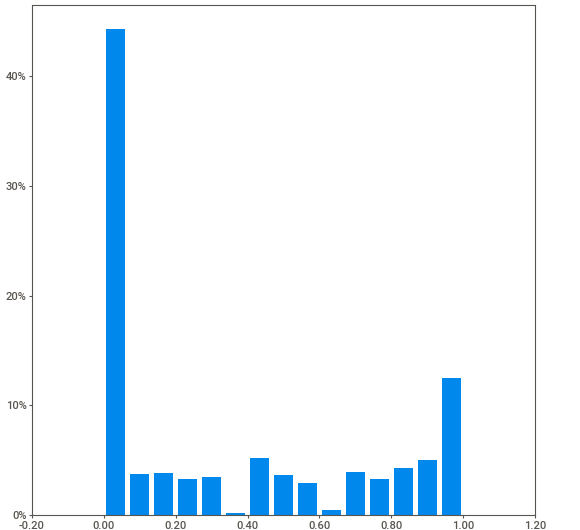
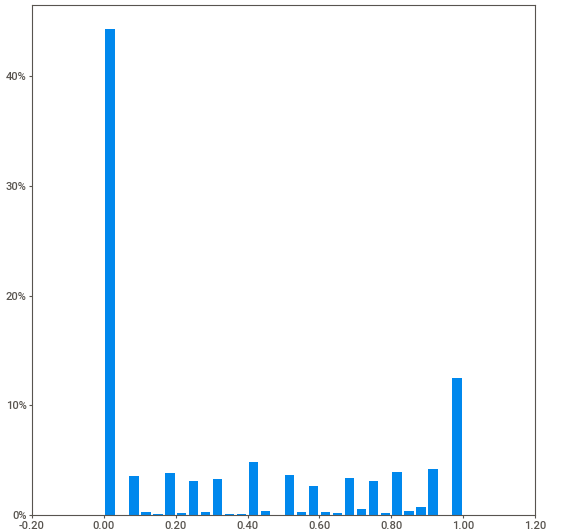
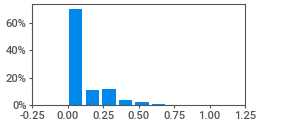
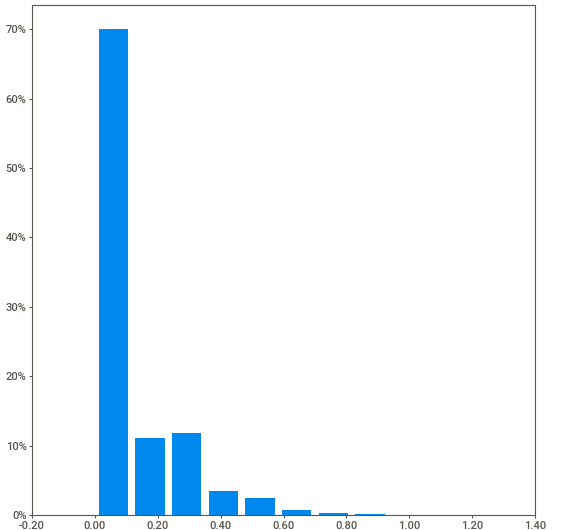
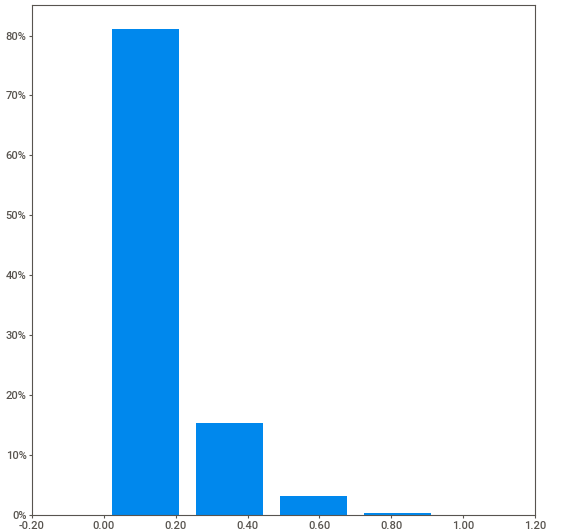
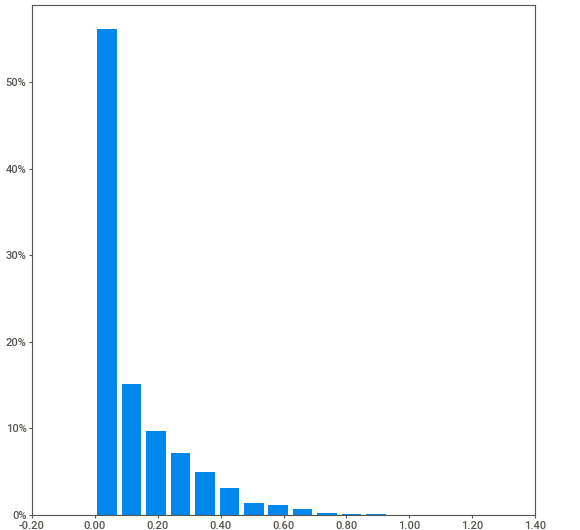
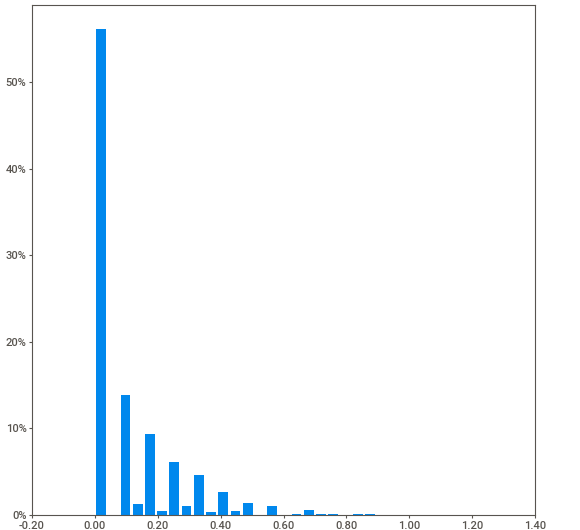
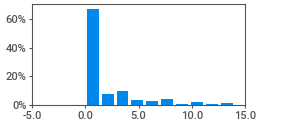
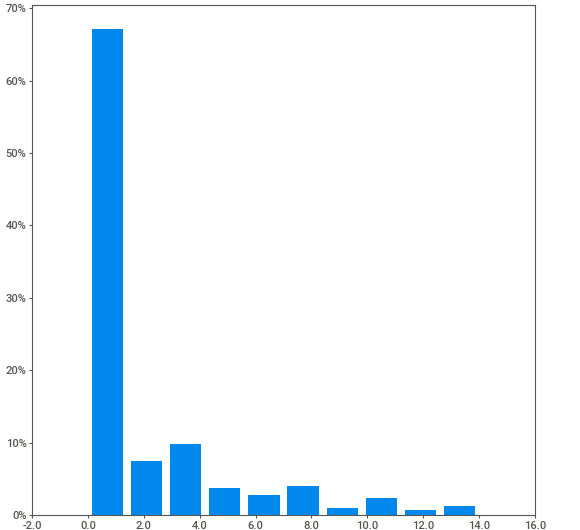
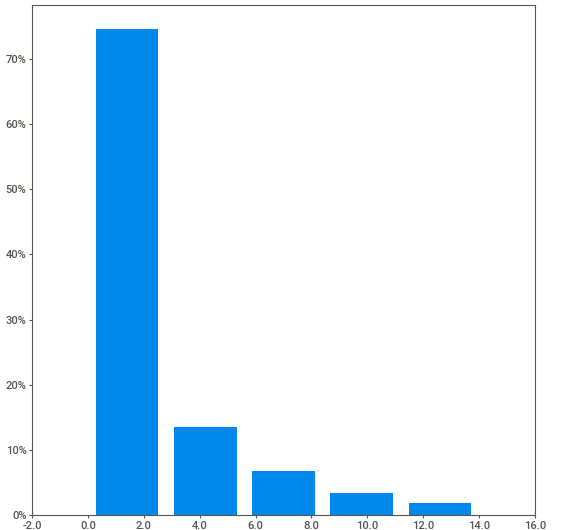
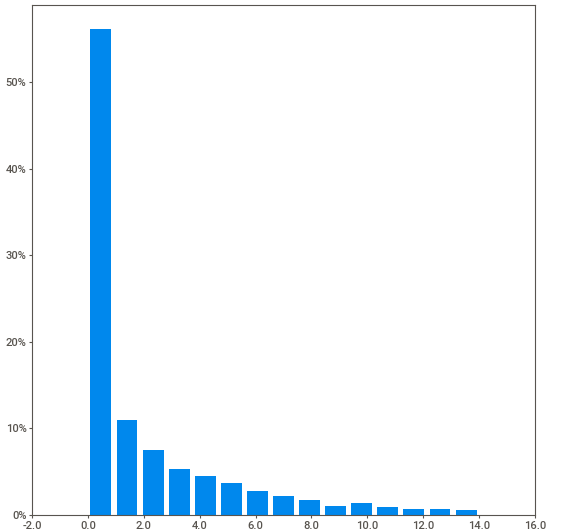
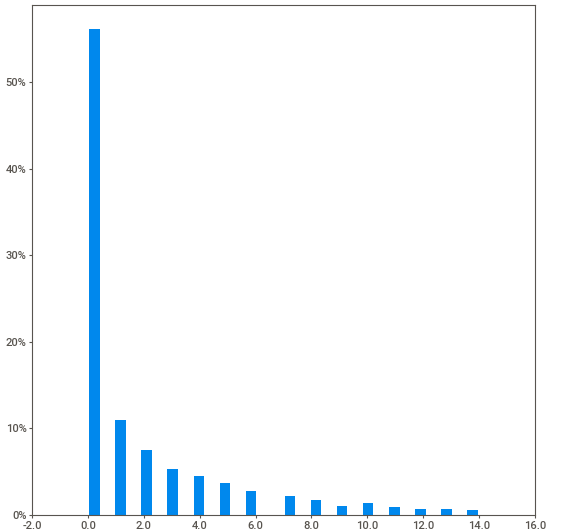
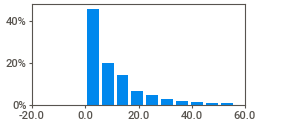
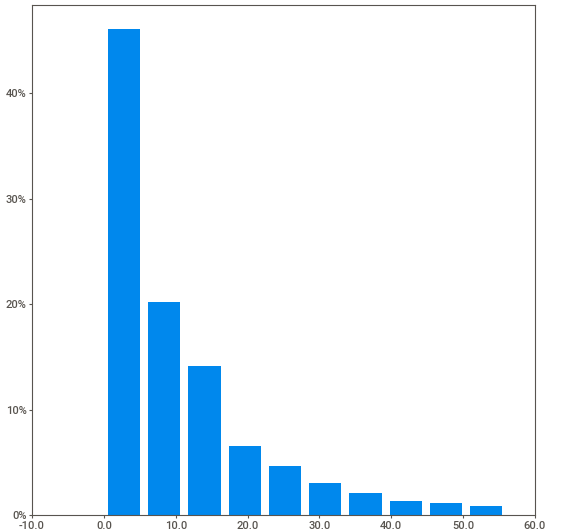
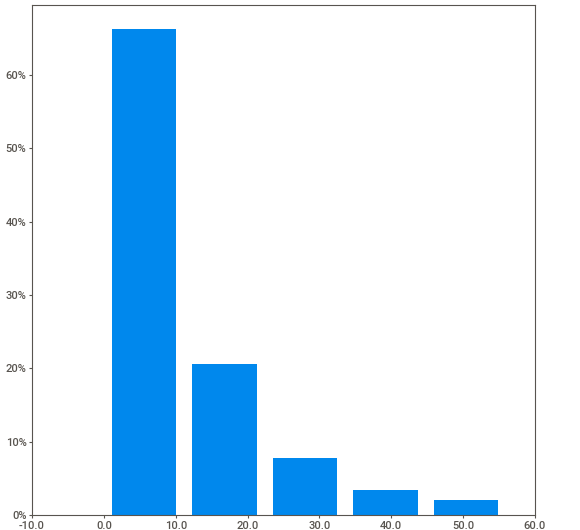
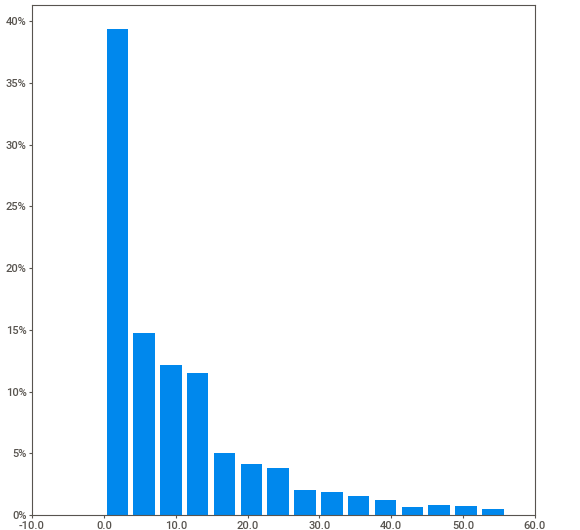
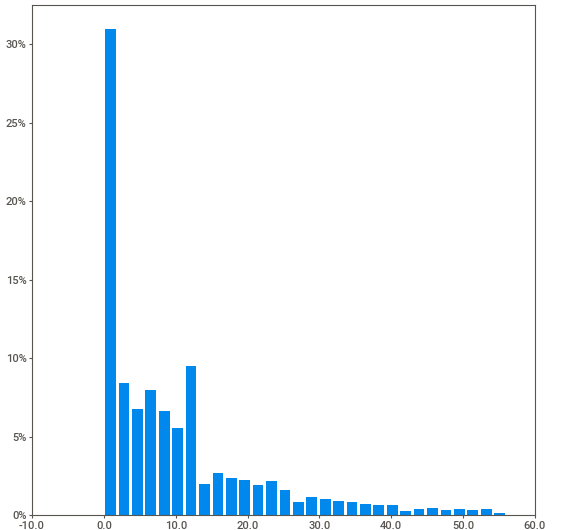
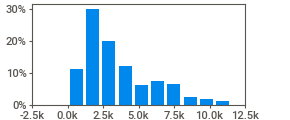
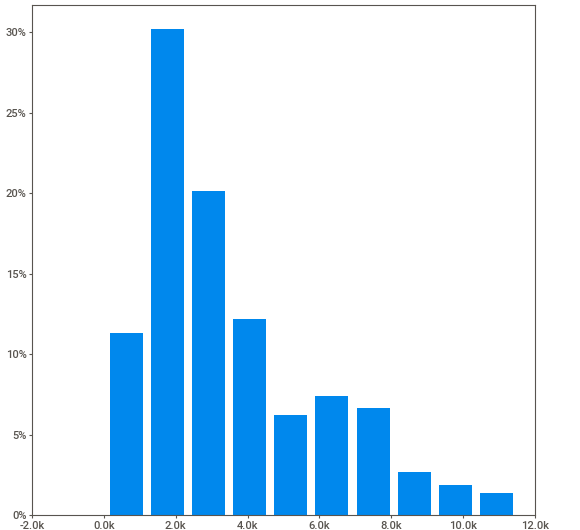
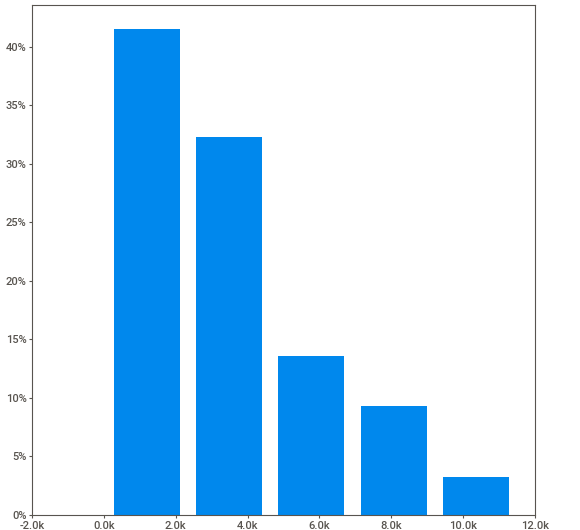
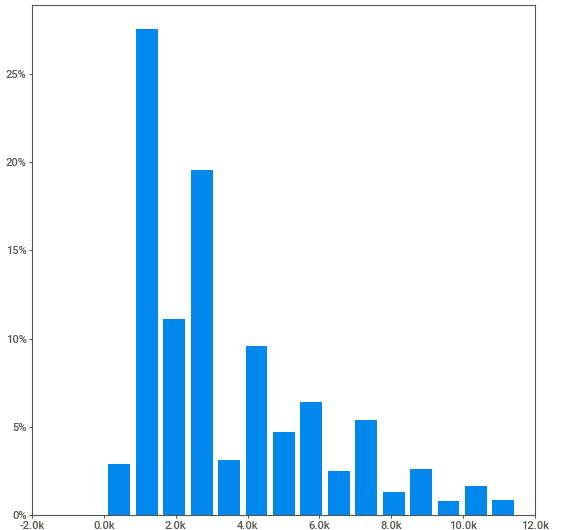
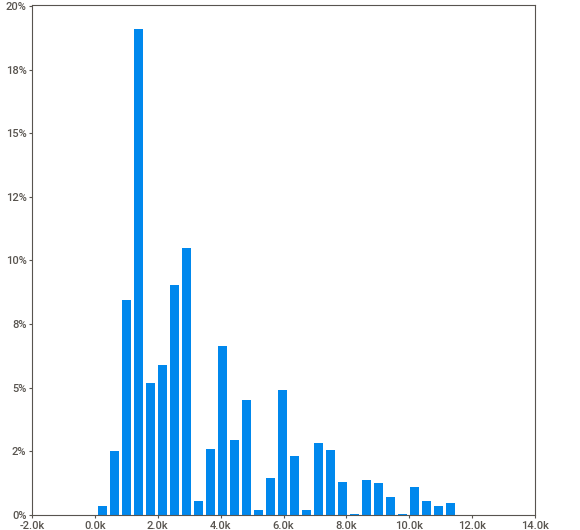
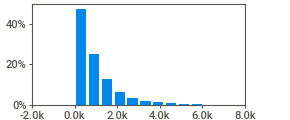
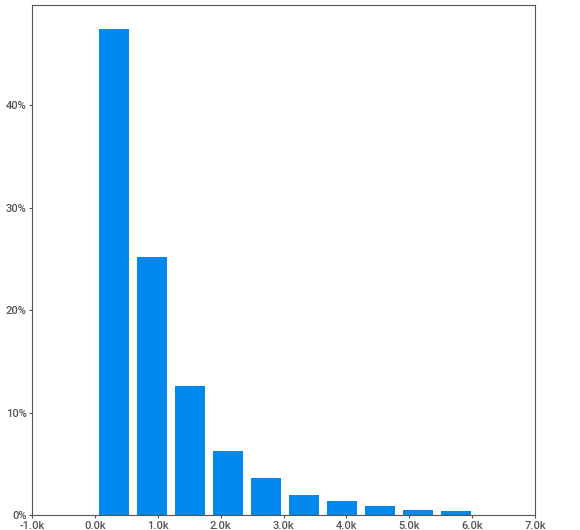
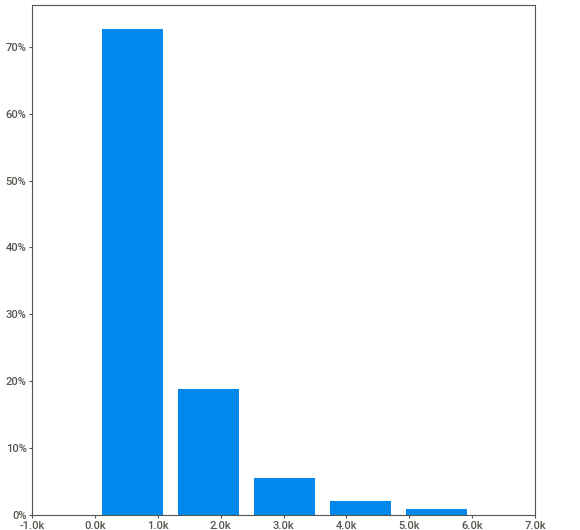
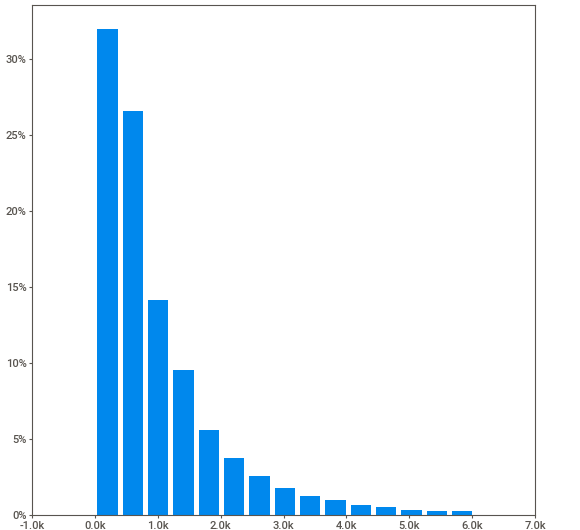
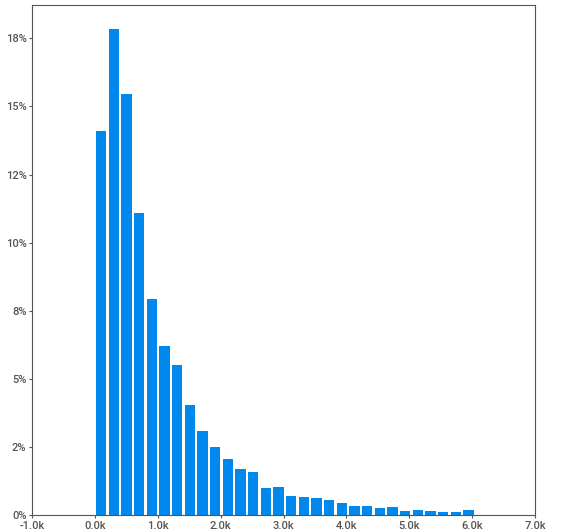
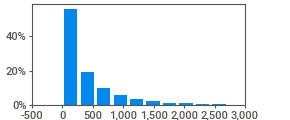
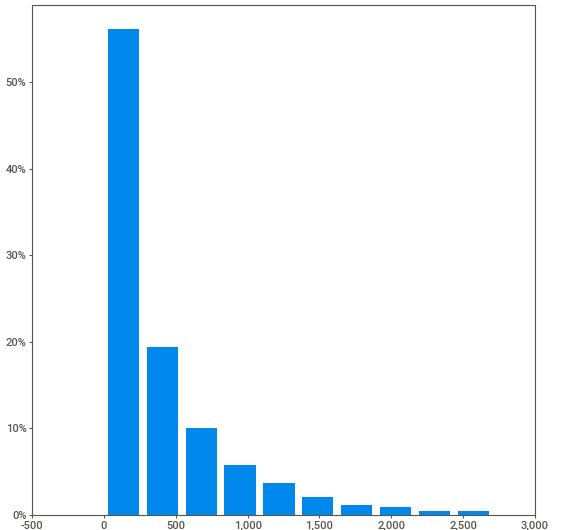
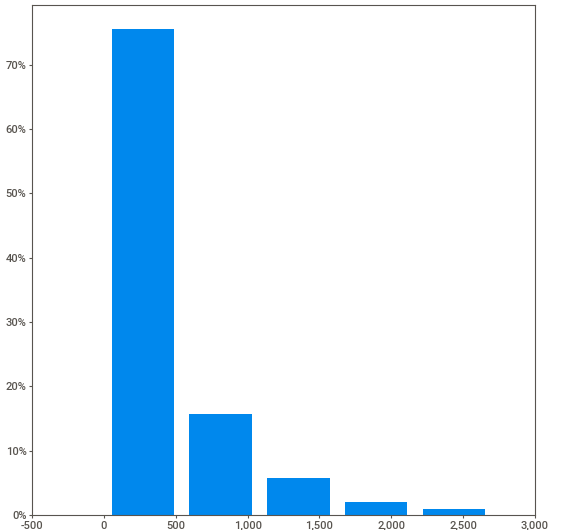
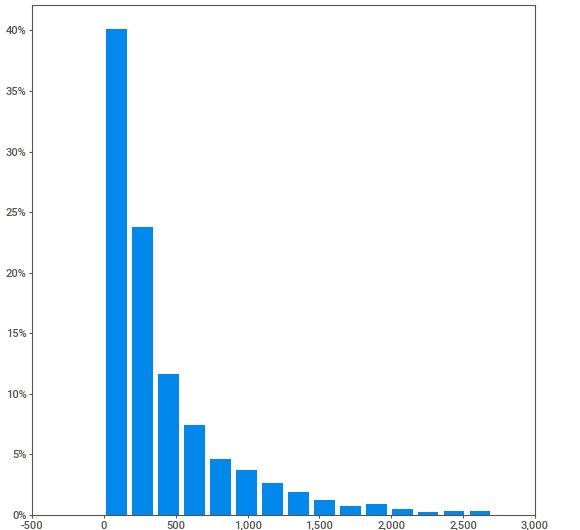
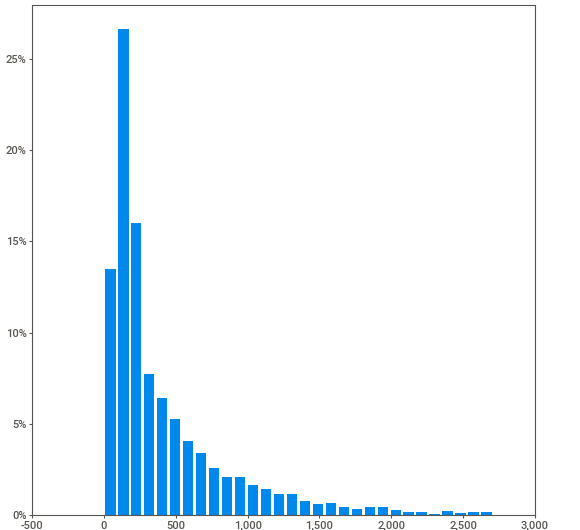
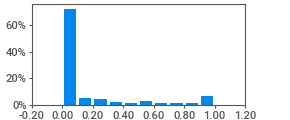
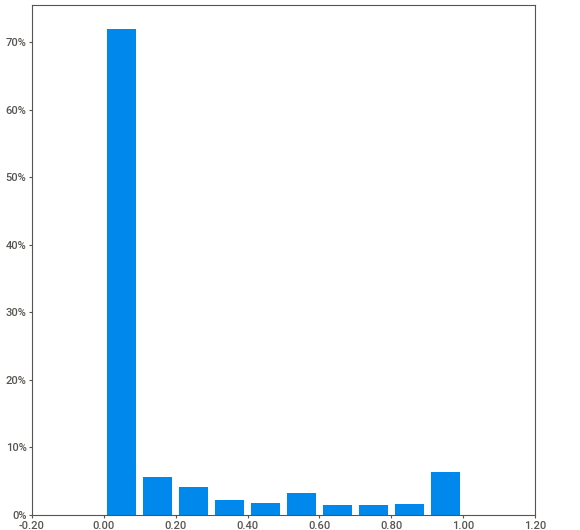
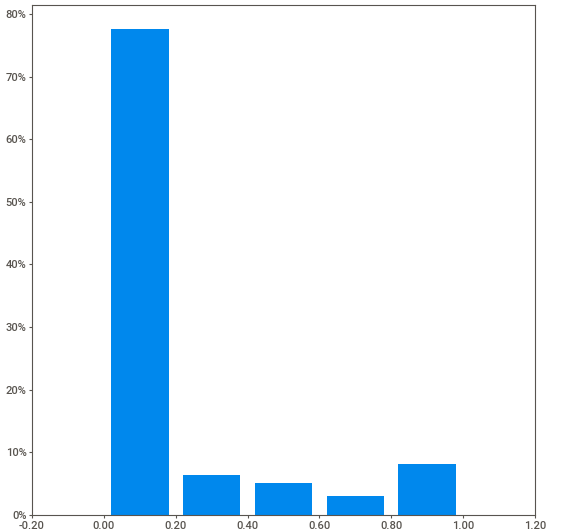
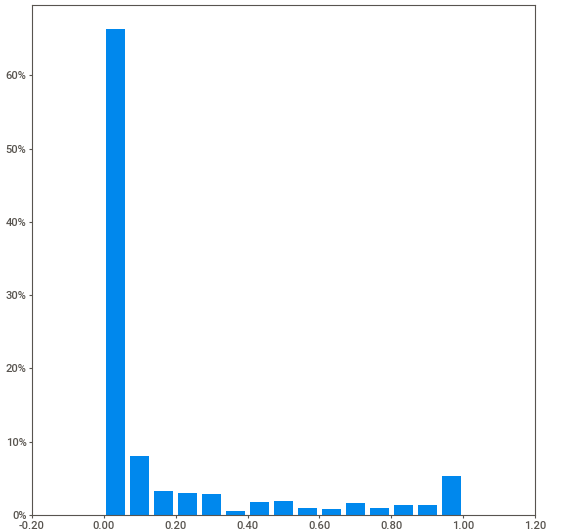
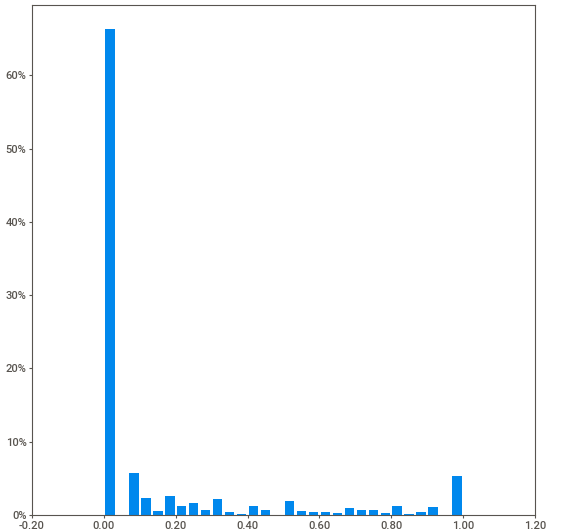
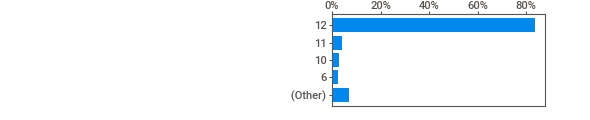
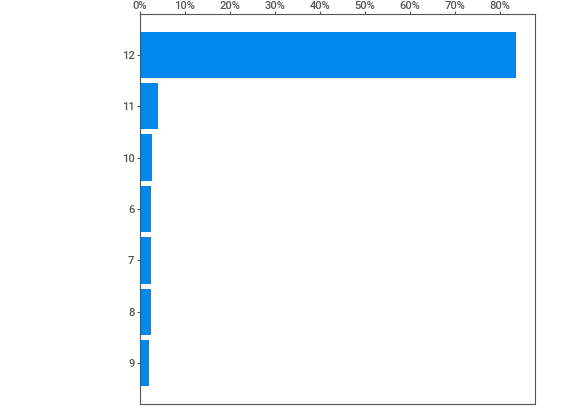
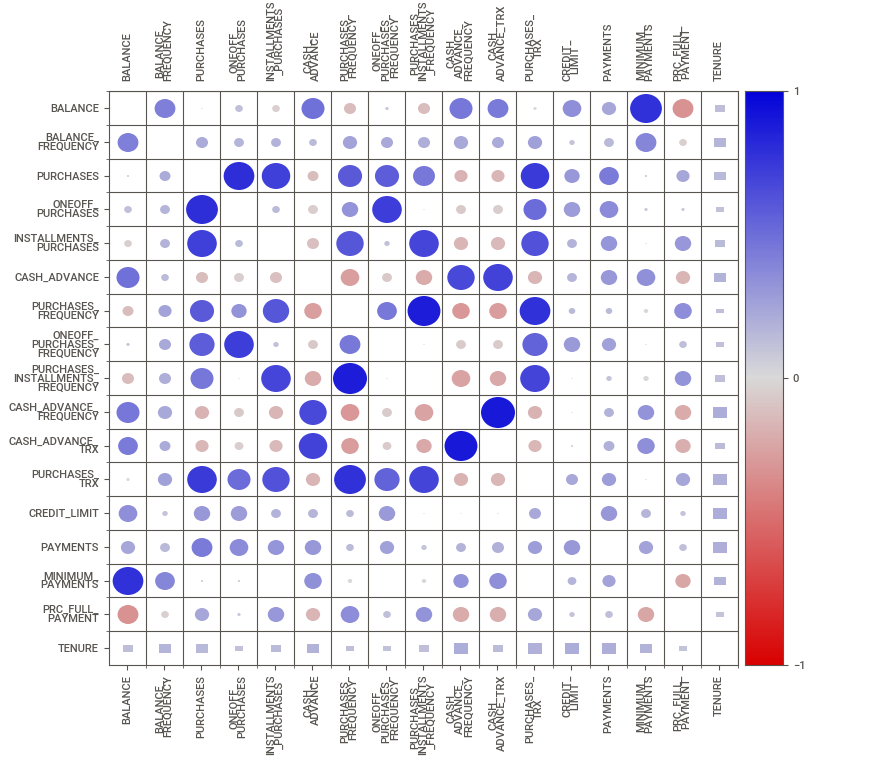
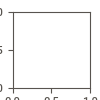

In [12]:
analise = sv.analyze(source = df1)
analise.show_notebook()

In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)

In [16]:
# Normalizing
normalized_df = normalize(scaled_df,axis=1)

In [17]:
inertias = []
K = range(1, 10)
from scipy.spatial.distance import cdist
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(normalized_df)
    inertias.append(kmeanModel.inertia_)

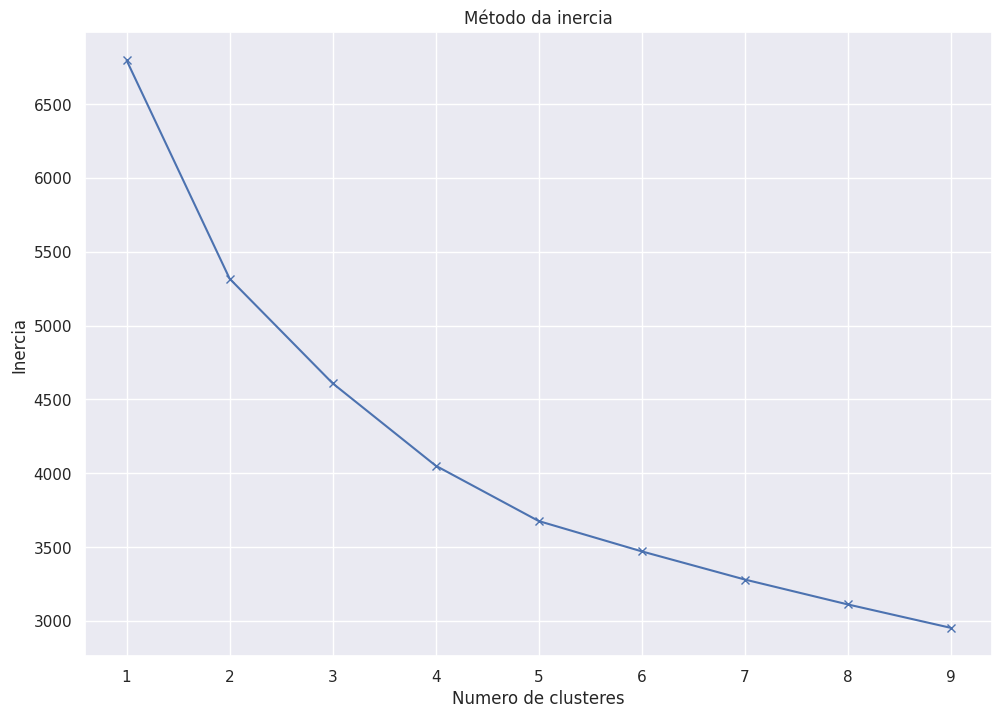

In [18]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Método da inercia')
plt.show()

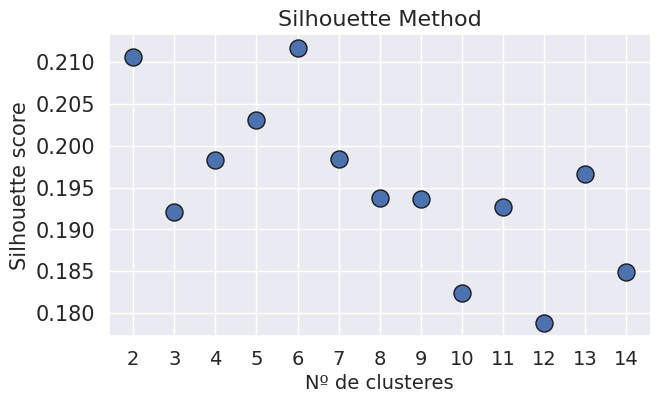

In [19]:
from sklearn.metrics import silhouette_score
alvo = normalized_df
max = 15
km_scores= []
km_silhouette = []

for i in range(2,max):
  km = KMeans(n_clusters=i, random_state=0).fit(alvo)
  preds = km.predict(alvo)
  km_scores.append(-km.score(alvo))
  silhouette = silhouette_score(alvo,preds)
  km_silhouette.append(silhouette)

# Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Nº de clusteres",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture

In [ ]:
GM = GaussianMixture()

In [22]:
GM = GaussianMixture(max_iter=10*8, n_components=4)
GM.fit(normalized_df)
labels = GM.n_components
print("Numero de Clusteres: {}".format(labels))

FloatingPointError: ignored